In [29]:
from bs4 import BeautifulSoup
import requests
import pickle
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import scipy as sp
%matplotlib inline
import math
import numpy as np
import seaborn as sms

In [30]:
#openning the file after closing the notebook 
import pickle
class Company(object):
    def __init__(self, rec):
        self.rec = rec
        
with open('recent_data.pkl', 'rb') as input:
    rdatar = pickle.load(input)    

recents = rdatar.rec  

In [31]:
recents.head()

,Year,Country,Lifter,Birth,Weight,Snatch,Clean and Jerk,Total
0,1998,BUL,IVANOV Ivan,1971,55.86,122.5,160.0,282.5
1,1998,CUB,VARGAS William Trujillo,1970,55.94,127.5,155.0,282.5
2,1998,ROU,JIGAU Adrian Ioan,1970,55.79,117.5,145.0,262.5
3,1998,CUB,ALVAREZ BOULET Sergio,1979,55.75,115.0,142.5,257.5
4,1998,FRA,BONNEL Eric,1974,55.50,110.0,142.5,252.5


In [413]:
#looking at people on the 56 with at least a 210 total
recent56 = recents[(recents['Weight']<=56) & (recents['Weight'] >52) & (recents['Total']>210)]

In [414]:
#of those people choose their best total.
liftermax = pd.DataFrame(recent56.groupby('Lifter')['Total'].max(), columns= ['Total'])

In [415]:
#Grouping them by kilos range to see how these are distributed.
int_dist_56 = liftermax['Total'].groupby(pd.cut(liftermax['Total'], np.arange(207.5, 305, 5))).count()

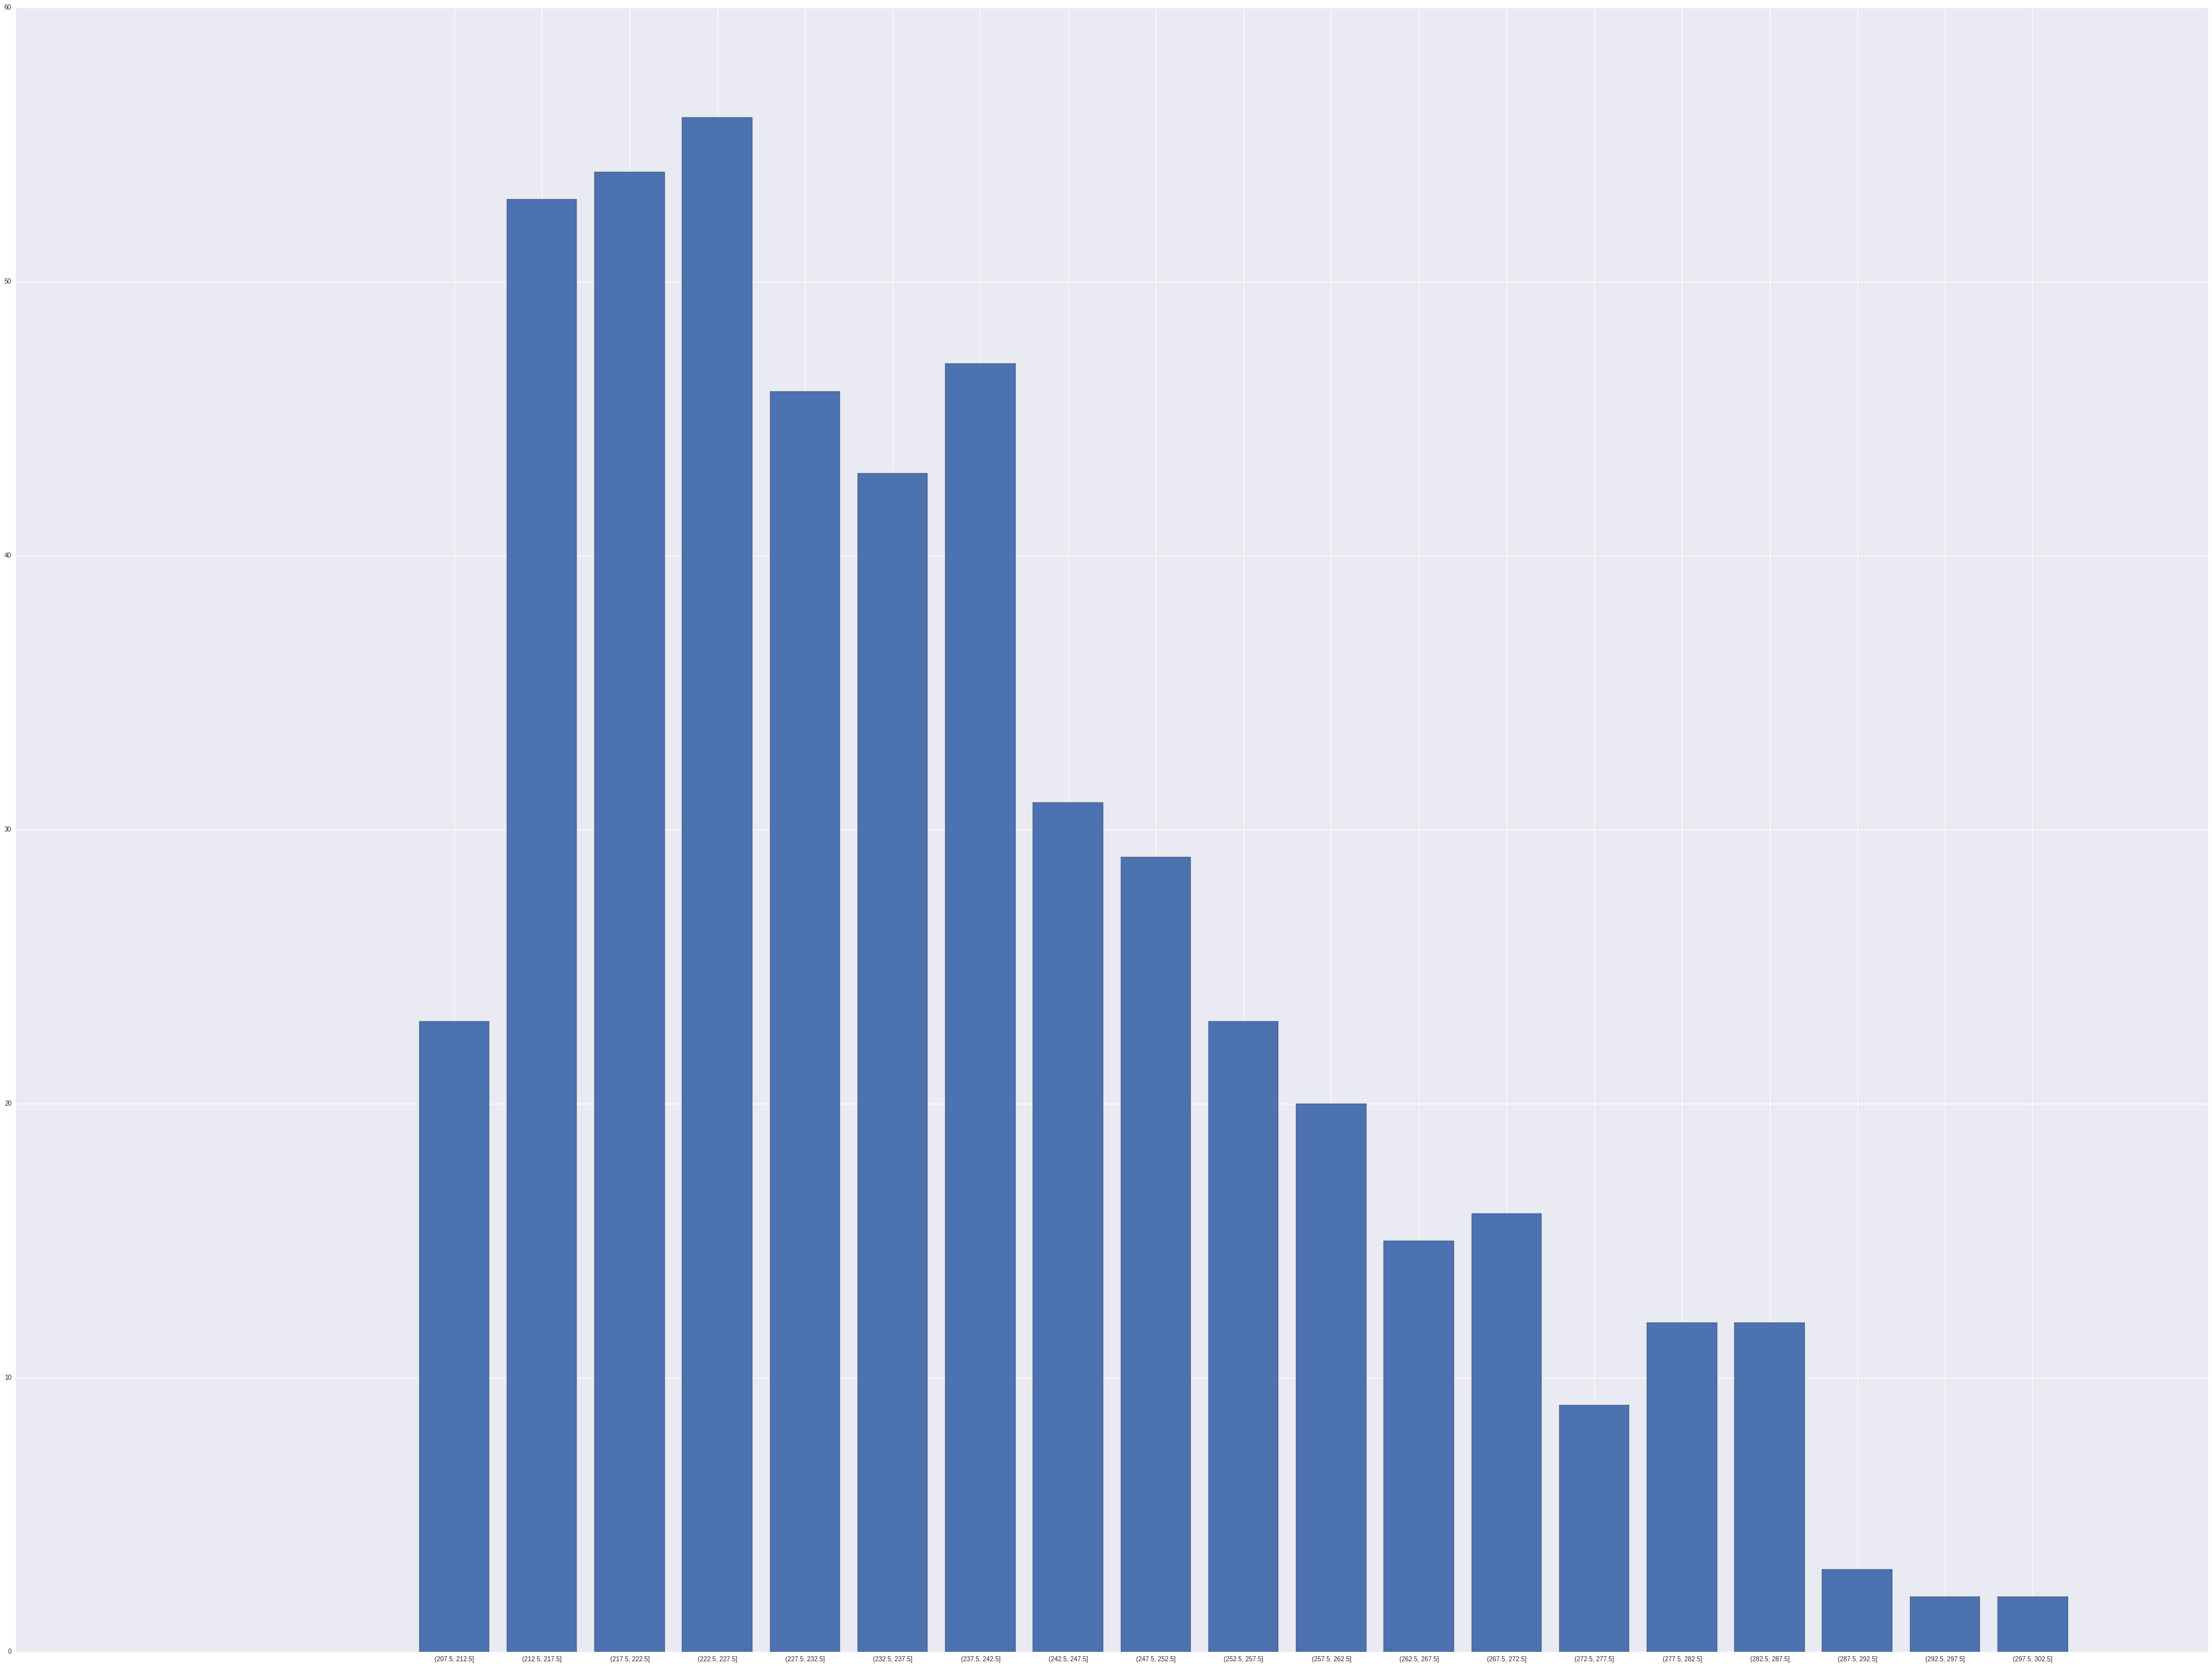

In [416]:
x = sp.arange(len(int_dist_56))
y = sp.array(int_dist_56)
f = plt.figure()
ax = f.add_axes([2, 20, 8, 9])
ax.bar(x, y, align='center')
ax.set_xticks(x)
ax.set_xticklabels(int_dist_56.index)
f.show()

In [417]:
maximum = recent56.groupby('Year')['Total'].max()

In [418]:
maximum

Year
1998    295.0
1999    302.5
2000    305.0
2001    300.0
2002    287.5
2003    287.5
2004    295.0
2005    281.0
2006    286.0
2007    283.0
2008    292.0
2009    292.0
2010    292.0
2011    292.0
2012    293.0
2013    289.0
2014    298.0
2015    302.0
Name: Total, dtype: float64

In [419]:
#openning the file after closing the notebook 
import pickle
class Company(object):
    def __init__(self, worldrec):
        self.worldrec = worldrec
        
with open('worldrecords_data.pkl', 'rb') as input:
    wrdatar = pickle.load(input)    

records = wrdatar.worldrec 

In [420]:
 records56 = records[(records["Weight Class"]==56) & (records['Event Code']==3) &(records['Year']>1972)]

In [421]:
len(records56)

20

In [481]:
records56.head()

,Event,Year,Country,Lifter,Weight Class,Record,Event Code
1103,Total,1973,Russia,Gennady CHETIN,56,255.0,3
1104,Total,1973,Bulgaria,Atanas KIROV,56,257.5,3
1147,Total,1974,Bulgaria,Atanas KIROV,56,260.0,3
1234,Total,1976,Bulgaria,Norair NURIKIAN,56,262.5,3
1324,Total,1979,Bulgaria,Anton KODZHABASHEV,56,265.0,3


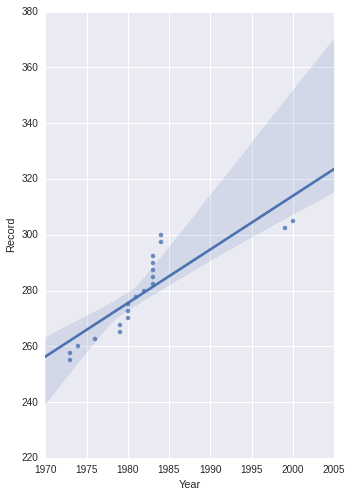

In [423]:
sms.pairplot(records56, x_vars='Year', y_vars='Record', size = 7, aspect=.7, kind='reg')

In [434]:
#world records
#bwrecords = [55.62, 61.81, 68.68, 76.4, 84.69, 93.52, 104.76, 147.48]
#totalrecords = [305, 332, 359, 380, 394, 418, 436, 472]

In [32]:
#Nel-Sinclair Curve
a = 85.477722914300003
b = 41.357074003999998
c = 0.0060825625000000003
d = 512.45085465119996
    
def NS(row): 
    return -(a*np.log(c*(row['Weight']-b))+d-row['Total'])
    
#NS = round(approx()-usertotal, 2)

In [33]:
#Nel-Sinclair Coefficient
recents['NSC'] = recents.apply(lambda row: NS(row),axis=1)

In [5]:
recentscoeff = recents[(recents['NSC']>=-150) & (recents['Weight']>52) & (recents['Birth']>=1960) & (recents['Year']>1970)].sort('NSC', ascending=True)

In [474]:
#yeartocoeff = recents40coeff.groupby('Lifter')['NSC','Year', 'Weight Class'].max()

In [6]:
recentscoeff.head()

,Year,Country,Lifter,Birth,Weight,Snatch,Clean and Jerk,Total,NSC
5531,2009,MRI,GAYA Hansley,1985,84.45,110,138.0,248.0,-149.998718
13890,2015,NRU,MALEKA Tango-Mark,1995,89.23,117,140.0,257.0,-149.990228
11740,2014,HON,PINEDA Jose,1988,60.80,80,100.0,180.0,-149.969088
11744,2014,PNG,LOHIA Igo,1999,59.69,75,100.0,175.0,-149.944312
831,1999,AUS,HOCKING Corran,1980,144.25,145,177.5,322.5,-149.892548


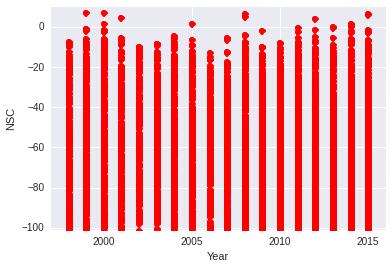

In [476]:
x = recentscoeff['Year']
y = recentscoeff['NSC']
plt.plot(x, y, 'ro')
plt.axis([1997, 2016, -101, 10])
plt.xlabel('Year')
plt.ylabel('NSC')
plt.savefig('NSC.png')
plt.savefig('NSC.pdf')
plt.show()

In [477]:
len(x)

12390

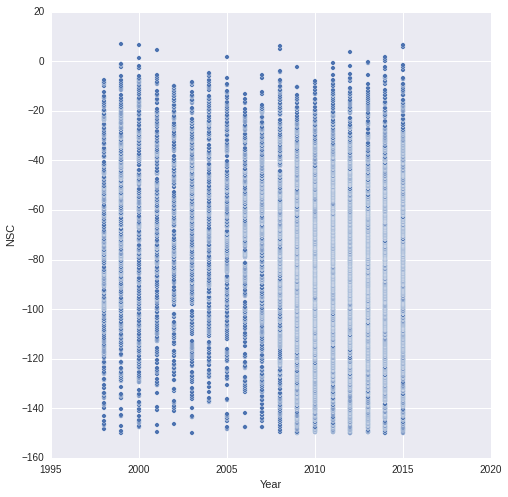

In [478]:
sms.pairplot(recentscoeff, x_vars='Year', y_vars='NSC', size = 7, aspect=1.)

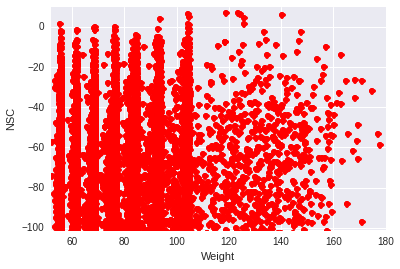

In [479]:
x = recentscoeff['Weight']
y = recentscoeff['NSC']
plt.plot(x, y, 'ro')
plt.axis([52, 180, -101, 10])
plt.xlabel('Weight')
plt.ylabel('NSC')
plt.savefig('WNSC.png')
plt.savefig('WNSC.pdf')
plt.show()

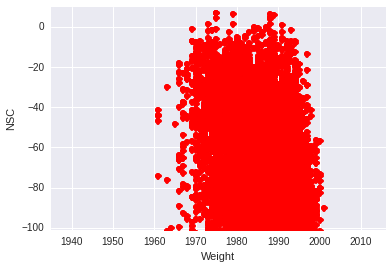

In [480]:
x = recentscoeff['Birth']
y = recentscoeff['NSC']
plt.plot(x, y, 'ro')
plt.axis([1935, 2016, -101, 10])
plt.xlabel('Weight')
plt.ylabel('NSC')
plt.savefig('WNSC.png')
plt.savefig('WNSC.pdf')
plt.show()

In [34]:
Countries = []
for country in recents['Country']:
    if country not in Countries:
        Countries.append(country)

In [35]:
#Country Code
def CC(row):
    return float(Countries.index(row['Country']))

In [36]:
recents['CC'] = recents.apply(lambda row: CC(row),axis=1)

In [37]:
recents.head()

,Year,Country,Lifter,Birth,Weight,Snatch,Clean and Jerk,Total,NSC,CC
0,1998,BUL,IVANOV Ivan,1971,55.86,122.5,160.0,282.5,-22.412757,0
1,1998,CUB,VARGAS William Trujillo,1970,55.94,127.5,155.0,282.5,-22.882967,1
2,1998,ROU,JIGAU Adrian Ioan,1970,55.79,117.5,145.0,262.5,-41.999190,2
3,1998,CUB,ALVAREZ BOULET Sergio,1979,55.75,115.0,142.5,257.5,-46.761965,1
4,1998,FRA,BONNEL Eric,1974,55.50,110.0,142.5,252.5,-50.264201,3


In [38]:
Lifters = []
for lifter in recents['Lifter']:
    if lifter not in Lifters:
        Lifters.append(lifter)

In [39]:
def LC(row):
    return float(Lifters.index(row['Lifter']))

In [40]:
#Lifters code
recents['LC'] = recents.apply(lambda row: LC(row),axis=1)

In [41]:
recents.sort('Year', ascending=True)

,Year,Country,Lifter,Birth,Weight,Snatch,Clean and Jerk,Total,NSC,CC,LC
9628,0,RUS,KIREEV Rinat,1987,93.95,160.0,190.0,350.0,-65.027826,42,4081
9912,0,POL,KOCHANSKI Martin,1991,114.10,158.0,190.0,348.0,-94.752529,9,3718
9894,0,RUS,KADANETS David,1986,140.20,176.0,212.0,388.0,-80.960027,42,1418
9893,0,POL,KLICKI Krzysztof,1990,163.60,170.0,219.0,389.0,-98.122186,9,3717
9857,0,UGA,BALIGEYA Godfrey,1987,104.15,110.0,140.0,250.0,-180.179676,40,2219
9759,0,RUS,MURATOV Gennady,1987,104.25,178.0,217.0,395.0,-35.315694,42,3656
9651,0,POL,SAMORAJ Jaroslaw Pawel,1994,92.90,150.0,180.0,330.0,-83.304027,9,4161
9634,0,RUS,IVANUSHKIN Alexander,1991,92.34,150.0,190.0,340.0,-72.370253,42,4604
9632,0,FIN,ANTTIROIKO Miika Matias,1988,93.60,151.0,191.0,342.0,-72.457081,31,1954
263,1998,POL,GLADYS Janusz,1971,92.10,152.5,190.0,342.5,-69.466920,9,263


In [42]:
#Function to find the age of the lifter at the time.
def Age(row):
    return float(row['Year']-row['Birth'])

In [43]:
#Adding his age to the table
recents['Age'] = recents.apply(lambda row: Age(row),axis=1)

In [44]:
recents.head()

,Year,Country,Lifter,Birth,Weight,Snatch,Clean and Jerk,Total,NSC,CC,LC,Age
0,1998,BUL,IVANOV Ivan,1971,55.86,122.5,160.0,282.5,-22.412757,0,0,27
1,1998,CUB,VARGAS William Trujillo,1970,55.94,127.5,155.0,282.5,-22.882967,1,1,28
2,1998,ROU,JIGAU Adrian Ioan,1970,55.79,117.5,145.0,262.5,-41.999190,2,2,28
3,1998,CUB,ALVAREZ BOULET Sergio,1979,55.75,115.0,142.5,257.5,-46.761965,1,3,19
4,1998,FRA,BONNEL Eric,1974,55.50,110.0,142.5,252.5,-50.264201,3,4,24


In [45]:
recents = recents[['Lifter','LC','Country', 'CC','Age', 'Birth', 'Weight', 'Year', 'Snatch', 'Clean and Jerk', 'Total', 'NSC']]

In [46]:
recents.head()

,Lifter,LC,Country,CC,Age,Birth,Weight,Year,Snatch,Clean and Jerk,Total,NSC
0,IVANOV Ivan,0,BUL,0,27,1971,55.86,1998,122.5,160.0,282.5,-22.412757
1,VARGAS William Trujillo,1,CUB,1,28,1970,55.94,1998,127.5,155.0,282.5,-22.882967
2,JIGAU Adrian Ioan,2,ROU,2,28,1970,55.79,1998,117.5,145.0,262.5,-41.999190
3,ALVAREZ BOULET Sergio,3,CUB,1,19,1979,55.75,1998,115.0,142.5,257.5,-46.761965
4,BONNEL Eric,4,FRA,3,24,1974,55.50,1998,110.0,142.5,252.5,-50.264201


In [47]:
#saving recents with codes
class Company(object):
    def __init__(self, rec):
        self.rec = rec

with open('recent_comp.pkl', 'wb') as output:
    recent_comp = Company(recents)
    pickle.dump(recent_comp, output, pickle.HIGHEST_PROTOCOL)

#opens the file to make sure it worked    
with open('recent_comp.pkl', 'rb') as input:
    rdatac = pickle.load(input)    

recent_complete = rdatac.rec 

In [3]:
#reopening data
class Company(object):
    def __init__(self, rec):
        self.rec = rec


#opens the file to make sure it worked    
with open('recent_comp.pkl', 'rb') as input:
    rdatac = pickle.load(input)    

recent_complete = rdatac.rec 

In [4]:
recents =recent_complete

In [5]:
recentscoeff = recents[(recents['NSC']>=-150) & (recents['Weight']>52) & (recents['Birth']>=1960) & (recents['Year']>1970)].sort('NSC', ascending=True)

In [6]:
recentscoeff.head()

,Year,Country,Lifter,Birth,Weight,Snatch,Clean and Jerk,Total,NSC,CC,LC
5531,2009,MRI,GAYA Hansley,1985,84.45,110,138.0,248.0,-149.998718,84,2880
13890,2015,NRU,MALEKA Tango-Mark,1995,89.23,117,140.0,257.0,-149.990228,24,6192
11740,2014,HON,PINEDA Jose,1988,60.80,80,100.0,180.0,-149.969088,98,5463
11744,2014,PNG,LOHIA Igo,1999,59.69,75,100.0,175.0,-149.944312,88,4846
831,1999,AUS,HOCKING Corran,1980,144.25,145,177.5,322.5,-149.892548,27,666


In [7]:
2015	PUR	REYES Bruno	1995	68.35	110.0	137.0	247.0	-111.013605	54	5968

SyntaxError: invalid syntax (<ipython-input-7-1cdcd67a33bc>, line 1)

In [16]:
X = np.array(recentscoeff[['LC', 'CC', 'Birth', 'Year']])
y = np.array(recentscoeff['NSC'])

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
nei = KNeighborsRegressor(n_neighbors=100, weights='distance',
                          algorithm='ball_tree', leaf_size=1000, metric='manhattan')

In [19]:
from sklearn.cross_validation import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [21]:
nei.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1000, metric='manhattan',
          metric_params=None, n_neighbors=100, p=2, weights='distance')

In [24]:
nei.predict([4846,88,1999,2016])

array([-106.84217559])